In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
def true_polynomial_fn(x):
    
    return 5*x*x*x + 3*x*x + 2*x + 12 

In [6]:
np.random.seed(0)

n_samples = 30
degree = 3

X = np.sort(np.random.rand(n_samples))
x = X.reshape(-1, 1)

y = true_polynomial_fn(X) + np.random.randn(n_samples) * 0.1

In [7]:
x

array([[0.0202184 ],
       [0.07103606],
       [0.0871293 ],
       [0.11827443],
       [0.14335329],
       [0.38344152],
       [0.41466194],
       [0.4236548 ],
       [0.43758721],
       [0.46147936],
       [0.52184832],
       [0.52889492],
       [0.54488318],
       [0.5488135 ],
       [0.56804456],
       [0.60276338],
       [0.63992102],
       [0.64589411],
       [0.71518937],
       [0.77815675],
       [0.78052918],
       [0.79172504],
       [0.79915856],
       [0.83261985],
       [0.87001215],
       [0.891773  ],
       [0.92559664],
       [0.94466892],
       [0.96366276],
       [0.97861834]])

In [8]:
y

array([12.12814809, 12.08478626, 12.42731582, 12.14135141, 12.36766259,
       13.47112889, 13.85492963, 13.91289064, 13.88406848, 14.09105519,
       14.48245855, 14.43863815, 14.75454097, 14.84335357, 15.14360988,
       15.51072686, 15.77984092, 15.86036353, 16.68909282, 17.58687372,
       17.59570126, 18.14039246, 18.01524585, 18.5872924 , 19.1781611 ,
       19.79302519, 20.22491895, 20.76037159, 21.09822405, 21.5550924 ])

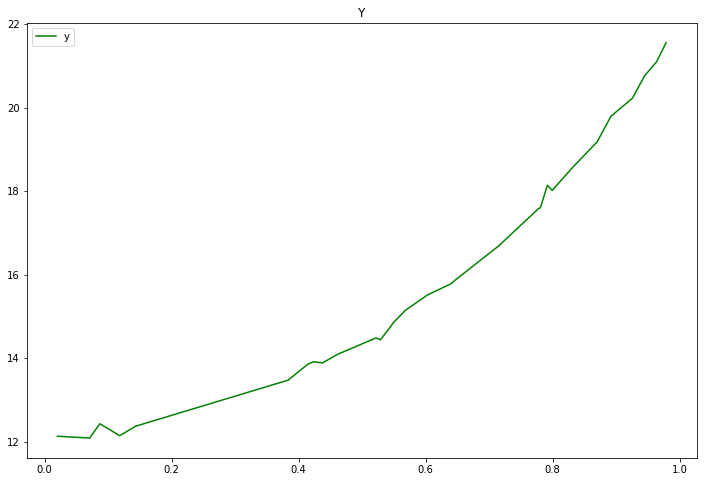

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(x, y , color='green', label="y")

plt.title('Y')
plt.legend()

In [17]:
linear_regression_underfitted = LinearRegression().fit(x, y)

y_pred_underfitted = linear_regression_underfitted.predict(x)

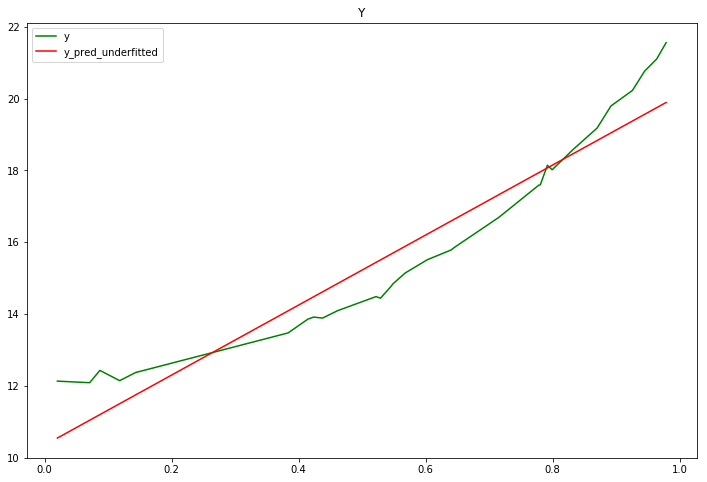

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(x, y, color='green', label="y")
plt.plot(x, y_pred_underfitted, color='red', label="y_pred_underfitted")

plt.title('Y')
plt.legend()

In [19]:
polynomial_features = PolynomialFeatures(degree=3,
                                         include_bias=True)

In [20]:
polynomial_features.fit_transform(x)

array([[1.00000000e+00, 2.02183974e-02, 4.08783595e-04, 8.26494919e-06],
       [1.00000000e+00, 7.10360582e-02, 5.04612156e-03, 3.58456585e-04],
       [1.00000000e+00, 8.71292997e-02, 7.59151487e-03, 6.61443374e-04],
       [1.00000000e+00, 1.18274426e-01, 1.39888398e-02, 1.65452200e-03],
       [1.00000000e+00, 1.43353287e-01, 2.05501650e-02, 2.94593371e-03],
       [1.00000000e+00, 3.83441519e-01, 1.47027398e-01, 5.63764089e-02],
       [1.00000000e+00, 4.14661940e-01, 1.71944524e-01, 7.12988501e-02],
       [1.00000000e+00, 4.23654799e-01, 1.79483389e-01, 7.60389992e-02],
       [1.00000000e+00, 4.37587211e-01, 1.91482567e-01, 8.37903227e-02],
       [1.00000000e+00, 4.61479362e-01, 2.12963202e-01, 9.82781225e-02],
       [1.00000000e+00, 5.21848322e-01, 2.72325671e-01, 1.42112694e-01],
       [1.00000000e+00, 5.28894920e-01, 2.79729836e-01, 1.47947689e-01],
       [1.00000000e+00, 5.44883183e-01, 2.96897683e-01, 1.61774555e-01],
       [1.00000000e+00, 5.48813504e-01, 3.01196262e

In [22]:
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])

In [23]:
pipeline.fit(x, y)
y_predicted = pipeline.predict(x)

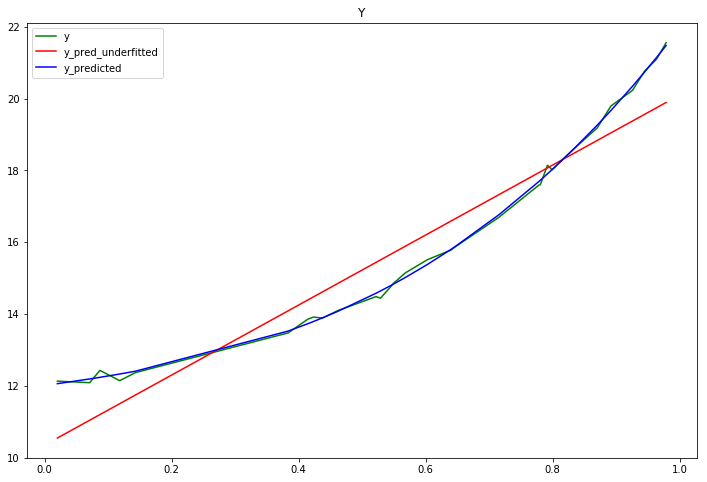

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(x, y, color='green', label="y")

plt.plot(x, y_pred_underfitted, color='red', label="y_pred_underfitted")

plt.plot(x, y_predicted, color='blue', label="y_predicted")

plt.title('Y')
plt.legend()